![syarah](./Syarah_Logo.png)

# **Syarah.com**

**Data Source : Saudi Arabia Used Cars**
### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# Saudi Arabia Used Cars

### **Business Problem Understanding**

![marketsize](./marketsize.jpg)

#### **Context**

Saudi Arabia Used Car Market was valued at USD 4.91 billion in 2021 and is expected to surpass a net valuation of USD 8.69 billion by 2027 end, registering a solid CAGR (Compound Annual Growth Rate) growth of 7.36% over the forecast period.

The COVID-19 pandemic had a moderate impact on the market as initial lockdowns in 2020 resulted in a slowdown in demand, however with ease in restrictions in 2021 consumers were encouraged to prefer used cars over new cars in wake of the pandemic coupled with fewer vehicle production due to supply chain disruptions and shortage of some auto components.

Syarah.com is one of a platform for buying and selling used cars in Saudi Arabia. This website allows users to search, compare, and purchase used cars with a wide range of brands, models, and prices. It is similar to other used car buying and selling platforms available in various countries.

On Syarah.com, you can find comprehensive information about the used cars for sale, including pictures, descriptions, prices, and contact information for the sellers. It is a valuable resource for individuals looking for used cars in Saudi Arabia who want to compare various options before making a purchase decision.

#### **Problem Statement**

Purchasing and selling used cars can be quite challenging, especially for those with limited knowledge about the automotive industry. Often, they need to find a suitable and fair price for the car they want to sell or buy. Considering this, a platform like 'Syarah.com' that can provide accurate price estimates would be helpful. These estimates can serve as valuable guidance for car owners looking to sell their vehicles, making it easier for them to determine a competitive price. On the other hand, buyers will also feel more confident when evaluating a fair price for the car they desire.

Although this Syarah.com provides price estimates, it still allows sellers the flexibility to set their prices according to their personal policies. Some sellers may choose to sell at a higher price, while others may want to offer a more competitive price for a quick sale. Thus, Syarah.com will help create transparency in the used car market, making it more accessible and assisting all parties, both sellers and buyers, in making better decisions.

#### **Goals**

Based on the issue, Syarah.com requires a program to assist them in predicting prices so that sellers can offer the right price. Price variations can be provided based on features, distance, brand, origin, gear type, seller's region, and of course, a price that suits them.

With this program, Syarah.com can help provide sellers and buyers with suitable prices, thereby increasing the number of transactions that generate profits for Syarah.com from both sellers and buyers, known as booking charges

#### **Analytic Approach**

So, what we need to do is analyze the data to identify patterns within the existing features that differentiate each vehicle.

Next, we will build a regression model that will assist the company in providing a pricing prediction tool for used cars newly listed on Syarah.com. This tool will be useful for sellers in determining the listing rental price.

#### **Metric Evaluation**

In evaluating a regression model for predicting used car rental prices, three key metrics come into play: RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error). RMSE measures the magnitude of prediction errors by averaging their square roots, while MAE calculates the average absolute error, offering a straightforward measure of accuracy. MAPE, on the other hand, provides a sense of error as a percentage of the actual values. Smaller values for these metrics indicate a more accurate model.

Additionally, if you're working with a linear model, R-squared (or adjusted R-squared) can be useful. It quantifies how well the model explains the overall data variance, with values closer to 1 signifying a better fit. However, remember that R-squared isn't suitable for non-linear models. Utilizing this combination of metrics allows for a comprehensive evaluation of your model's ability to predict rental prices, considering both the magnitude and percentage of prediction errors, and, when applicable, the model's explanatory power in relation to the data.

### **Data Understanding**
- The dataset contains 5624 records of used cars collected from syarah.com
- Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

#### **Features**
-	Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car in KM
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price in SAR (Saudi Arabia Riyal)

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


### **Data Preprocessing**
At this stage, we will perform data cleaning, and the cleaned data will be used for the subsequent analysis processes. Some of the tasks involved are as follows:
- Dropping features that are not relevant to the current problem.
- Handling missing values, if any. This can be done by either dropping the feature if it's not needed or by imputing it with a logically reasonable value based on the specific case.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


#### **Check Missing Values**

In [4]:
# The percentage of missing values in each column.
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

There is no missing values

#### **Check Duplicate**

In [5]:
len(df[df.duplicated()])

4

There are 4 duplicated data

In [6]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [7]:
df = df.drop_duplicates()
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


I decide to delete the duplicate data

In [8]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [9]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


The minimum value in the Price column is 0, indicating that there are prices listed as 0. Upon further investigation with the Negotiable column, where the value is True, it appears that when Price is 0, it means the price is either 0 or undetermined. Therefore, I will not display data where the Price value is equal to 0.

In [10]:
df = df[df['Price'] != 0]
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


#### **Drop Columns**

'Negotiable' column is not necessary for analysis, so I will delete it.

In [11]:
df = df.drop(['Negotiable'], axis=1)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


#### **Check Outlier**

**Car's Price Distribution Plot**

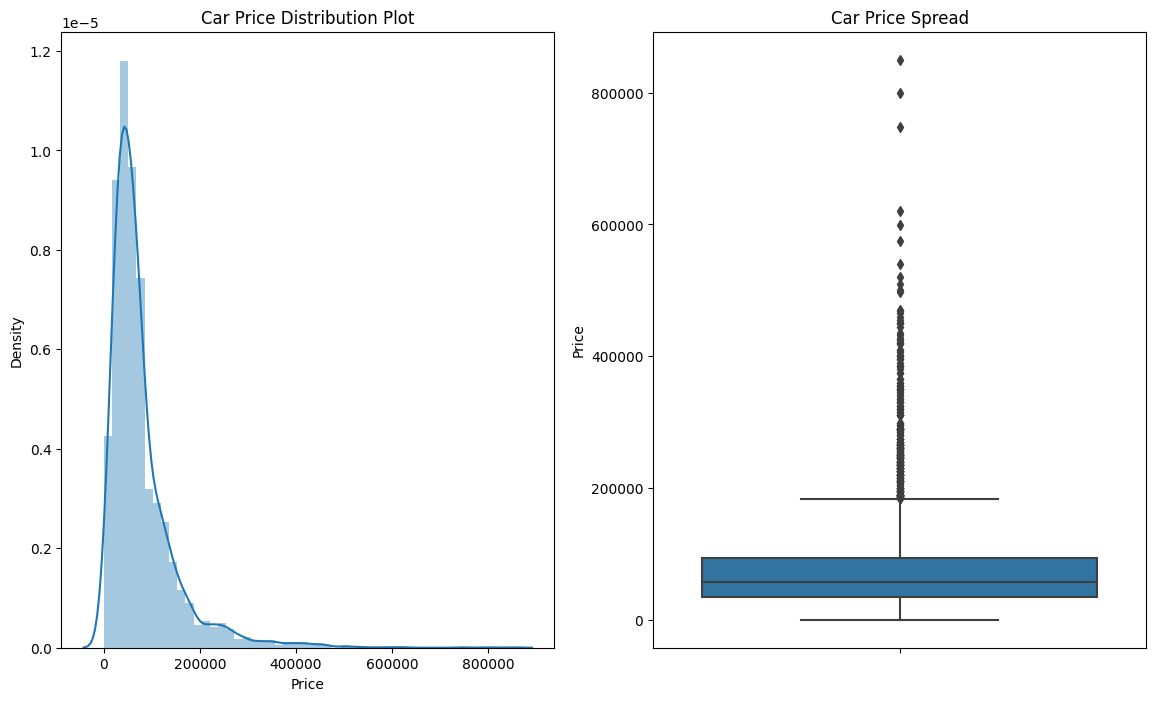

In [12]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

The plot seemed to be right-skewed, meaning that the most prices in the dataset are relatively low (Below 90,000 SAR).

Lowest Price in Syarah.com

![lowest](./low.jpg)

Highest Price in Syarah.com

![high](./high.jpg)

After checking syarah.com, I found that the lowest selling price for cars is 26,000 SAR. Therefore, I will only display data for cars priced above 25,000 SAR.

In [13]:
df = df[df['Price'] > 25000]
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


**Car's Year Distribution Plot**

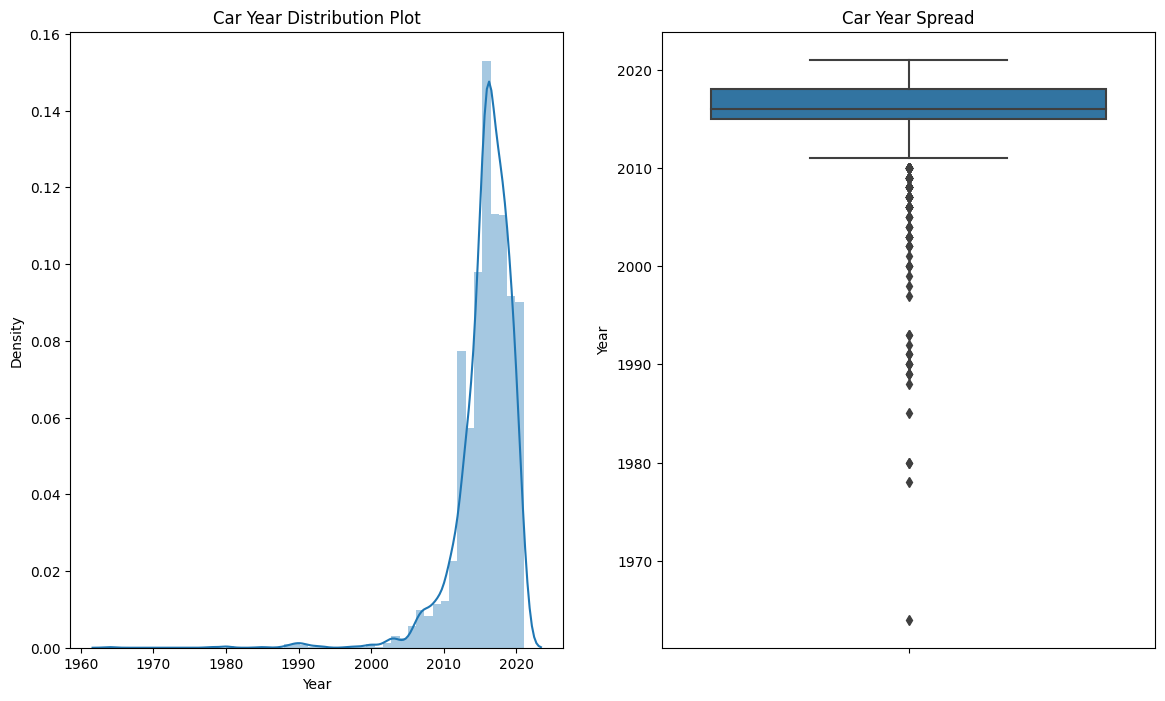

In [14]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Year Distribution Plot')
sns.distplot(df.Year)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Year Spread')
sns.boxplot(y=df.Year)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

The plot seemed to be left-skewed, meaning that the most years in the dataset are relatively in between 2010 and 2020

**Car's Mileage Distribution Plot**

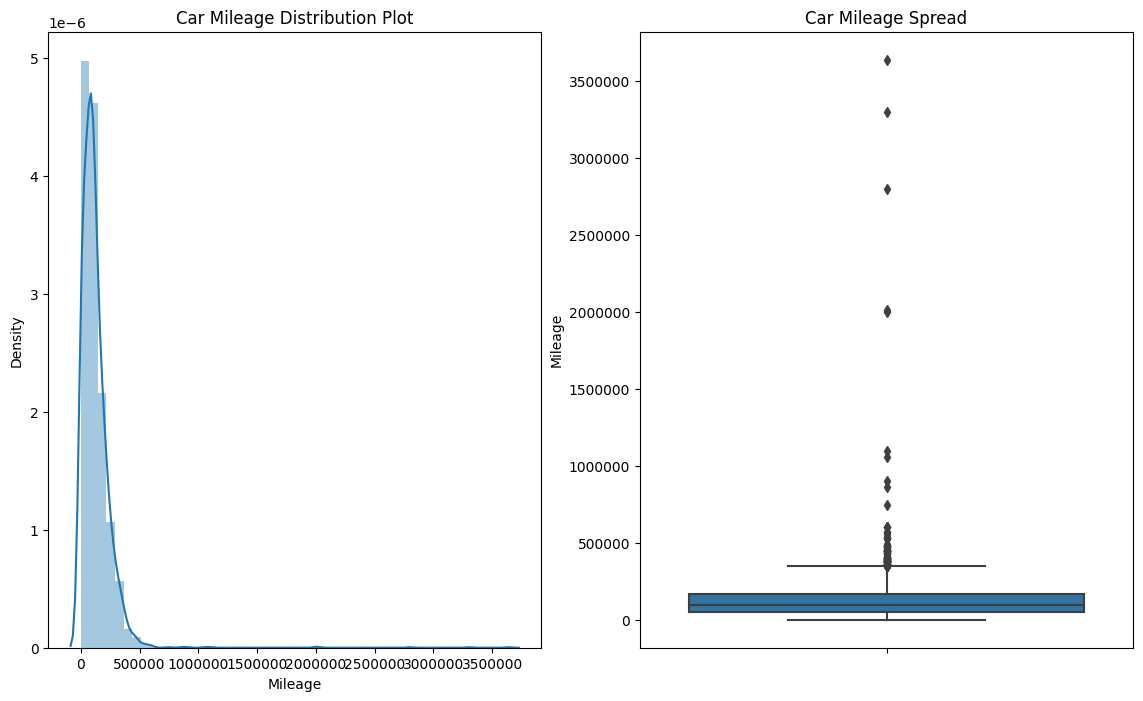

In [15]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Mileage Distribution Plot')
sns.distplot(df.Mileage)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Mileage Spread')
sns.boxplot(y=df.Mileage)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

The plot seemed to be right-skewed, meaning that the most years in the dataset are relatively under 500000. However, there is an outlier data for its mileage, which is above 500,000. After checking on Syarah.com, it turns out that there are cars being sold with mileage exceeding that.

![mil](./mil.jpg)

#### **Rename Columns**

To better identify column names, I have changed some column names to the following:
- Type = Model
- Make = Brand
- Gear_Type = Gear
- Options = Features

In [16]:
df = df.rename(columns={"Type": "Model", "Make": "Brand", "Options": "Features" })
df

,Model,Region,Brand,Gear_Type,Origin,Features,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


#### **Check Unique Values**

In [17]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Model,281,"[Yukon, Range Rover, Optima, CX3, Cayenne S, Sonata, Avalon, C300, Land Cruiser, LS, FJ, Tucson, Pajero, Azera, 5, ML, Corolla, Tahoe, A, Expedition, Senta fe, X, Land Cruiser Pickup, VTC, Malibu, The 5, Patrol, Grand Cherokee, SL, Previa, MKZ, Datsun, Hilux, GLC, Edge, 6, Innova, Navara, G80, Carnival, Camaro, Accord, Taurus, Camry, Elantra, Flex, S, Cerato, Furniture, Land Cruiser 70, Altima, 3, Pick up, Charger, H6, Hiace, Sunny, Accent, CX9, Yaris, Sierra, Durango, CT-S, Sylvian Bus, ES, Navigator, The 7, Creta, CS35, The 3, GLE, Sedona, Victoria, Prestige, CLA, Vanquish, Cadenza, Silverado, Rio, X-Trail, C, Seven, Prado, LX, Impala, QX, H1, Rav4, The M, Genesis, Fusion, Traverse, Suburban, SEL, Civic, Echo Sport, Challenger, CL, Wrangler, Maxima, ...]"
1,Region,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam, Jeddah, Al-Baha, Jazan, Al-Namas, Qassim, Al-Medina, Taef, Al-Ahsa, Sabya, Al-Jouf, Yanbu, Khobar, Najran, Aseer, Hail, Tabouk, Jubail, Besha, Qurayyat, Sakaka, Wadi Dawasir, Arar]"
2,Brand,53,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Toyota, Chrysler, Lexus, Mitsubishi, MG, Mercedes, Chevrolet, Ford, BMW, Nissan, Jeep, Lincoln, Genesis, Honda, Zhengzhou, Dodge, HAVAL, Cadillac, Changan, Aston Martin, INFINITI, Audi, Rolls-Royce, MINI, Other, BYD, Volkswagen, Victory Auto, Suzuki, Renault, Geely, Isuzu, Daihatsu, Maserati, GAC, Bentley, Chery, Jaguar, Peugeot, Foton, Mercury, Fiat, Iveco, FAW, Great Wall, Hummer, Ferrari]"
3,Gear_Type,2,"[Automatic, Manual]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Features,3,"[Full, Semi Full, Standard]"
6,Year,35,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 2008, 2020, 2018, 2021, 2010, 2017, 2007, 2009, 2005, 1990, 2006, 1998, 1980, 2002, 2003, 1988, 2000, 1991, 1964, 2004, 1999, 1989, 2001, 1978, 1985, 1993, 1997, 1992]"
7,Engine_Size,64,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, 3.0, 1.5, 1.6, 6.2, 5.3, 5.4, 3.3, 2.5, 3.6, 4.7, 3.7, 2.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.4, 6.9, 3.2, 6.0, 1.0, 2.2, 5.6, 2.9, 4.1, 1.7, 8.8, 1.2, 9.0, 1.9, 7.5, 4.3, 3.4, 2.8, 8.5, 2.3, 1.3, 7.2, 7.0, 6.3, 1.1, 5.8, 5.2, 6.4, 2.1, 3.1, 6.7, 4.4, 3.9, 8.7, 6.1, 6.6, 4.9, 6.8]"
8,Mileage,1208,"[80000, 140000, 220000, 25000, 189000, 155, 110864, 200, 79000, 299000, 17000, 71000, 85000, 74715, 284000, 3400, 139240, 296, 105920, 10000, 292000, 270000, 350000, 92000, 98000, 307801, 62000, 38000, 208000, 11000, 245000, 81000, 156000, 228000, 98100, 182000, 210800, 88000, 82808, 4000, 70000, 115, 91440, 45000, 50100, 35449, 180, 66200, 89000, 349000, 105000, 130000, 256, 73000, 866, 216, 148000, 188257, 117000, 211257, 135000, 290000, 43632, 530500, 153000, 126000, 180000, 108000, 122000, 53000, 181000, 13800, 9000, 168000, 86500, 192692, 48000, 38920, 32000, 3000, 334000, 34000, 229000, 151000, 201000, 130, 147000, 101732, 9800, 231000, 487100, 92412, 128, 200000, 124000, 79968, 240000, 63000, 132000, 103000, ...]"
9,Price,364,"[120000, 260000, 42000, 58000, 85000, 48000, 81500, 55000, 145000, 38000, 140000, 200000, 65000, 76000, 32000, 45000, 30000, 149000, 179000, 49500, 52000, 72000, 105000, 99000, 57000, 110000, 265000, 56500, 90000, 71500, 29000, 62000, 141000, 230000, 225000, 60000, 93000, 68000, 50000, 69000, 121500, 51000, 109000, 47000, 88000, 142000, 53000, 39000, 78500, 35000, 45500, 33000, 125000, 63000, 80000, 44000, 54000, 37000, 79000, 70000, 81000, 68500, 33500, 118000, 36500, 75000, 61500, 44500, 107000, 102000, 99500, 122000, 77000, 100000, 59500, 119000, 38500, 165000, 330000, 72910, 410000, 400000, 35500, 66000, 76500, 27000, 95000, 115000, 26000, 69500, 28500, 185000, 210000, 40000, 245000, 27500, 89000, 49000, 138000, 126000, ...]"


In [18]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3293.000000,3293.000000,3.293000e+03,3293.000000
mean,2015.738840,3.237413,1.229814e+05,88063.851503
std,3.997242,1.444932,1.469408e+05,73555.866550
min,1964.000000,1.000000,1.000000e+02,25500.000000
25%,2015.000000,2.000000,4.800000e+04,45000.000000
50%,2016.000000,3.000000,9.800000e+04,65000.000000
75%,2018.000000,4.000000,1.680000e+05,105000.000000
max,2021.000000,9.000000,3.640000e+06,850000.000000


After Data Preprocessing, the data that was originally 5624 is now 3293.

### **Modelling**

In [19]:
# train test split
from sklearn.model_selection import train_test_split

# combining multiple preprocessing steps or other functions
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder and scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# ML algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# cross-validation to determine the best algorithm
from sklearn.model_selection import cross_val_score, KFold

# metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

#### **Data Splitting**

In [20]:
# Separate independent variable data from the target
X = df.drop(columns=['Price'])
y = df['Price']

In [21]:
X.head()

,Model,Region,Brand,Gear_Type,Origin,Features,Year,Engine_Size,Mileage
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000


In [22]:
y.head()

1    120000
2    260000
3    42000 
5    58000 
6    85000 
Name: Price, dtype: int64

In [23]:
y.describe()

count    3293.000000  
mean     88063.851503 
std      73555.866550 
min      25500.000000 
25%      45000.000000 
50%      65000.000000 
75%      105000.000000
max      850000.000000
Name: Price, dtype: float64

y actual maximum values is 850.000

#### **Train Test Split**

In [24]:
# Splitting data training dan test with proportion 75:25
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25,
    random_state=42
)

In [25]:
y_test.describe()

count    824.000000   
mean     87119.291262 
std      66798.877980 
min      25500.000000 
25%      44750.000000 
50%      65000.000000 
75%      109000.000000
max      575000.000000
Name: Price, dtype: float64

y actual and y_test have different maximum values, this will affect the accuracy of the car price prediction **especially for high price**.

#### **Encoding**
In order to use all the selected features, categorical features must be converted into numerical features. We can use ColumnTransformer to change their data type, which can then be applied to the model pipeline.

In [26]:
onehotcol = ['Gear_Type', 'Origin', 'Features']
binarycol = ['Model', 'Region', 'Brand']
robustcol = ['Year', 'Engine_Size', 'Mileage']

- I grouped Gear_type, Origin, and Features into **One-Hot** encoding because they are categorical variables with relatively low variability
- I converted the 'model,' 'region,' and 'brand' into **Binary** encoding because they exhibit more variability
- I transformed 'year,' 'engine_size,' and 'mileage' to **Robust** encoding because their values have outliers 


In [27]:
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(cols=binarycol), binarycol),
    ('onehot', OneHotEncoder(drop='first'), onehotcol),
    ('robust', RobustScaler(), robustcol),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary',
                                 BinaryEncoder(cols=['Model', 'Region',
                                                     'Brand']),
                                 ['Model', 'Region', 'Brand']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Features']),
                                ('robust', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

#### **Model Benchmarking**

In [28]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_validate

linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = {
    'Linear Regression': linreg,
    'Lasso': lasso,
    'Ridge': ridge,
    'Elastic Net': enet,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb,
}

metrics = {'msle': 'neg_mean_squared_log_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'mae': 'neg_root_mean_squared_error'}

test_msle_arr = []    
test_mape_arr = []
test_mae_arr = []
list_algo = []

for name_model, model in models.items():
    model_ttr = TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
    estimator = Pipeline([
        ('transform', transformer),
        ('model', model_ttr)
    ])
    list_algo.append(f'{name_model} + Transform Target Regressor')
    scores = cross_validate(estimator, X_train, y_train,cv=5, scoring=metrics)
    test_msle_arr.append(scores['test_msle'].mean())
    test_mape_arr.append(scores['test_mape'].mean())
    test_mae_arr.append(scores['test_mae'].mean())

for name_model, model in models.items():
    estimator = Pipeline([
        ('transform', transformer),
        ('model', model)
    ])
    list_algo.append(name_model)
    scores = cross_validate(estimator, X_train, y_train,cv=5, scoring=metrics)
    test_msle_arr.append(scores['test_msle'].mean())
    test_mape_arr.append(scores['test_mape'].mean())
    test_mae_arr.append(scores['test_mae'].mean())

model_bench = pd.DataFrame({
    'model': list_algo,
    'msle': test_msle_arr,
    'mape': test_mape_arr,
    'mae': test_mae_arr,
})

model_bench

,model,msle,mape,mae
0,Linear Regression + Transform Target Regressor,-0.197953,-0.338251,-57980.132669
1,Lasso + Transform Target Regressor,-0.390783,-0.514514,-77621.763411
2,Ridge + Transform Target Regressor,-0.197887,-0.338166,-57998.220484
3,Elastic Net + Transform Target Regressor,-0.390783,-0.514514,-77621.763411
4,KNN + Transform Target Regressor,-0.096253,-0.238138,-40705.963217
5,Decision Tree + Transform Target Regressor,-0.182149,-0.323036,-60130.225978
6,Random Forest + Transform Target Regressor,-0.091103,-0.213712,-41375.916866
7,XGBoost + Transform Target Regressor,-0.072485,-0.191868,-35784.690124
8,Linear Regression,NaN,-0.496687,-59498.133088
9,Lasso,NaN,-0.496646,-59497.615998


Here we use the MAPE metric to facilitate presenting error rates in percentage form. When observed, the MAPE levels of the top 2 models from table below are not significantly different, as are their MSLE and MAE. With the lowest MAPE rate, the XGBoost and Transform Target Regressor models are the top-performing models

In [29]:
model_bench.sort_values('mape', ascending=False)

,model,msle,mape,mae
7,XGBoost + Transform Target Regressor,-0.072485,-0.191868,-35784.690124
6,Random Forest + Transform Target Regressor,-0.091103,-0.213712,-41375.916866
4,KNN + Transform Target Regressor,-0.096253,-0.238138,-40705.963217
15,XGBoost,NaN,-0.242427,-37759.117062
14,Random Forest,-0.106073,-0.262797,-41623.798841
12,KNN,-0.106531,-0.266651,-40506.637559
13,Decision Tree,-0.182512,-0.319297,-54607.983852
5,Decision Tree + Transform Target Regressor,-0.182149,-0.323036,-60130.225978
2,Ridge + Transform Target Regressor,-0.197887,-0.338166,-57998.220484
0,Linear Regression + Transform Target Regressor,-0.197953,-0.338251,-57980.132669


After benchmarking the models and sorting them, it turns out that XGBoost and the transformed target regressor have the lowest MAPE rates. This indicates that both methods provide better prediction performance compared to other models. 

Next, predictions will be made on the test set using the best benchmark models, namely XGBoost and Transform Target Regressor.

#### **Predict to Test Set**
The predictions on the test set using the XGBoost and Transform Target Regressor models.

In [30]:
xgb = XGBRegressor(random_state=42)
xgb_ttr = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
model = Pipeline([
    ('transform', transformer),
    ('model', xgb_ttr)
])

score_rmsle = []
score_mae = []
score_mape = []

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_rmsle.append(mean_squared_log_error(y_test, y_pred, squared=False))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


score_before_tuning = pd.DataFrame({'RMSLE': score_rmsle, 
                                    'MAE': score_mae, 
                                    'MAPE': score_mape}, 
                                    index=['XGboost + Transform Target Regressor before tuning'])
score_before_tuning

,RMSLE,MAE,MAPE
XGboost + Transform Target Regressor before tuning,0.242227,16202.243956,0.181066


After predicting on the test set, the MAPE decreased, indicating that the XGBoost + Transform Target Regressor model is indeed the best-performing model compared to others.

**XGBoost and Transform Target Regressor**

In the context of predicting used car prices, XGBoost's ability to focus on challenging samples, such as cars with uncommon characteristics, makes it an ideal choice. XGBoost is a powerful machine learning algorithm that employs ensemble tree boosting techniques to construct a series of decision trees, enhancing predictions, particularly for challenging samples. It applies regularization and efficiently combines the results from these trees for the final prediction. With its robustness in handling missing values and a plethora of customizable parameters, XGBoost has become a widely favored tool in diverse modeling tasks.

Given the presence of numerous outliers in our data, Transform Target Regressor becomes a crucial support in model development as it proves reliable in handling outlier-rich datasets.

#### **Hyperparameter Tuning**
At this stage, we will perform hyperparameter tuning on the XGBoost model with the expectation of enhancing model performance.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space
param_space = {
    'model__regressor__n_estimators': range(50, 251, 50),  # Number of boosting rounds
    'model__regressor__max_depth': range(3, 11),           # Maximum depth of trees
    'model__regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],  # Learning rate
    'model__regressor__subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for training each tree
    'model__regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for building each tree
    'model__regressor__gamma': [0, 0.1, 0.2, 0.3, 0.4],   # Regularization parameter
    'model__regressor__min_child_weight': [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) needed in a child
}

# Create the XGBoost model
xgb = XGBRegressor(random_state=42)
xgb_ttr = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
model = Pipeline([
    ('transform', transformer),
    ('model', xgb_ttr)
])

# Create a RandomizedSearchCV object to search the hyperparameter space
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_space,
    n_iter=150,  # Number of random combinations to try
    scoring='neg_mean_absolute_percentage_error',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Increase verbosity for output
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your data

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(cols=['Model',
                                                                                                   'Region',
                                                                                                   'Brand']),
                                                                               ['Model',
                                                                                'Region',
                                                                                'Brand']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Features']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              Tr...
                                                                               1.0],
                                        'model__regressor__gamma': [0, 0.1, 0.2,
                                                                    0.3, 0.4],
                                        'model__regressor__learning_rate': [0.01,
                                                                            0.1,
                                                                            0.2,
                                                                            0.3,
                                                                            0.5],
                                        'model__regressor__max_depth': range(3, 11),
                                        'model__regressor__min_child_weight': [1,
                                                                               3,
                                                                               5,
                                                                               7],
                                        'model__regressor__n_estimators': range(50, 251, 50),
                                        'model__regressor__subsample': [0.7,
                                                                        0.8,
                                                                        0.9,
                                                                        1.0]},
                   scoring='neg_mean_absolute_percentage_error', verbose=2)

In [32]:
# Check score with the best params
random_search.best_params_

{'model__regressor__subsample': 0.9,
 'model__regressor__n_estimators': 200,
 'model__regressor__min_child_weight': 3,
 'model__regressor__max_depth': 6,
 'model__regressor__learning_rate': 0.1,
 'model__regressor__gamma': 0,
 'model__regressor__colsample_bytree': 0.9}

#### Predict to Test Set with the Tuned Model

Making predictions on the test set using the XGBoost model and the selected hyperparameters.

In [33]:
model = random_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_rmsle = []
score_mae = []
score_mape = []
score_rmsle.append(mean_squared_log_error(y_test, y_pred, squared=False))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


score_after_tuning = pd.DataFrame({'RMSLE': score_rmsle, 
                                    'MAE': score_mae, 
                                    'MAPE': score_mape}, 
                                    index=['XGBoost + Transform Target Regressor after tuning'])
score_after_tuning

,RMSLE,MAE,MAPE
XGBoost + Transform Target Regressor after tuning,0.228576,15134.37624,0.171326


#### **Performance Comparison**

In [34]:
score_before_tuning

,RMSLE,MAE,MAPE
XGboost + Transform Target Regressor before tuning,0.242227,16202.243956,0.181066


In [35]:
score_after_tuning

,RMSLE,MAE,MAPE
XGBoost + Transform Target Regressor after tuning,0.228576,15134.37624,0.171326


#### **Predicted vs Actual**

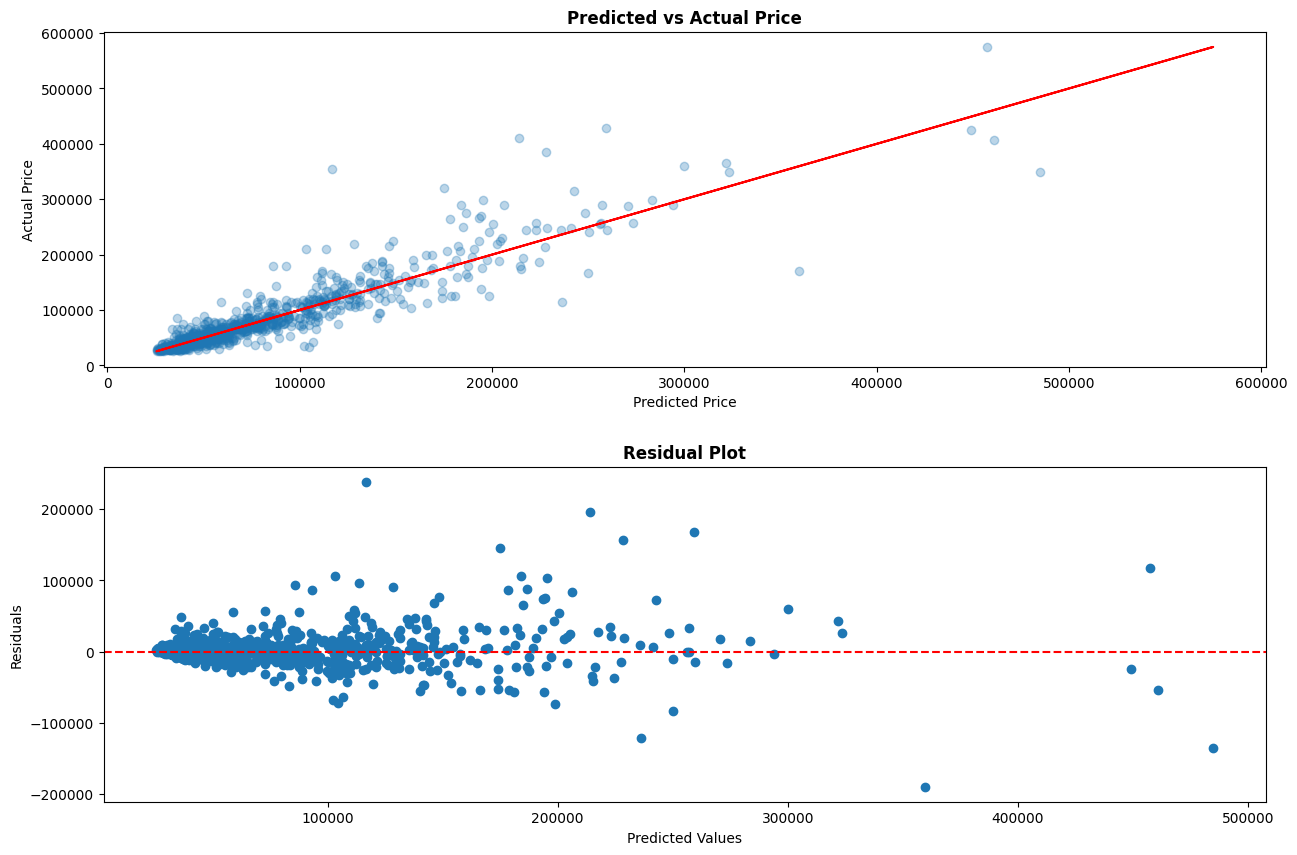

In [36]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
ax1.scatter(y_pred, y_test, alpha=0.3)
ax1.plot(y_test, y_test, color='r', alpha=1)
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Plot residual plot
diff = y_test - y_pred
ax2.scatter(y_pred, diff)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

plt.subplots_adjust(hspace=0.3)

When looking at the actual vs. predict plot, it is evident that the actual prices and predicted prices are close to the linear line within the price range below 200,000 SAR. The residual plot further substantiates that our predictions for actual prices are closely aligned with the residuals within the range below 200,000 SAR. These residuals represent the difference between the actual values and the model's predictions, where these points indicate how far the model's predictions are from the actual values. Both plots demonstrate that our predictive model performs well, particularly within the range below 200,000 SAR. However, for values above 200,000 SAR, and especially above 350,000 SAR, the predictive model encounters difficulties in making accurate price predictions.

### Why does this happen? Let's check this from feature importances to binning

#### **Feature Importances**

To be able to determine which features actually have a significant influence on the target (price), we can check it through the 'feature_importances_' function.

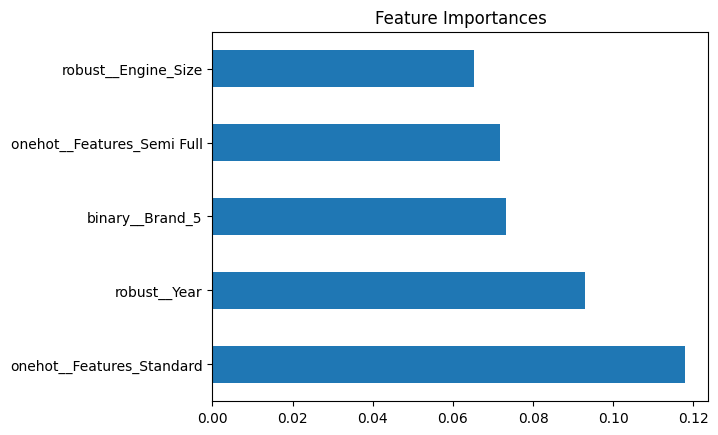

In [37]:
feature_imp = pd.Series(model.named_steps['model'].regressor_.feature_importances_,model.named_steps['transform'].get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

A high feature importance level for "onehot_Features_Standard" in the XGBoost model indicates that this feature has the strongest influence on the model's predictions. In other words, changes in "onehot_features_standard" will have a greater impact on the prediction outcomes compared to other features in the dataset. This helps you understand the key factors affecting the model's predictions and can be used for further model optimization.

#### **BINNING**

Binning is a data analysis technique of grouping data values into smaller categories or "bins," used to simplify complexity, address outliers, or enhance the performance of data analysis models.

In [38]:
y_test.describe()

count    824.000000   
mean     87119.291262 
std      66798.877980 
min      25500.000000 
25%      44750.000000 
50%      65000.000000 
75%      109000.000000
max      575000.000000
Name: Price, dtype: float64

If we backtrack to the train-test split section, the actual y has a maximum value reaching 850,000, but after creating y_test, the maximum value taken is only up to 575,000, and I say this will affect the model's prediction accuracy.

Here, we are grouping prices into 5 categories

In [39]:
data = pd.DataFrame(y_test).rename(columns={'Price':'true'})
data['pred'] = y_pred
data['bins'] = pd.cut(x=data['true'], 
                      bins=[25500, 57500, 110000, 850000],
                      labels=['25K-57K', '57K-110K', '110K-850K'])
data.head()

,true,pred,bins
5404,70000,65775.695312,57K-110K
5400,166500,146363.625000,110K-850K
5306,40000,57092.871094,25K-57K
3335,275000,248270.375000,110K-850K
4101,60000,55272.328125,57K-110K


In [40]:
from sklearn.metrics import mean_absolute_percentage_error

def mape(data):
    return mean_absolute_percentage_error([data['true']], [data['pred']])

data['mape'] = data[['true','pred']].apply(mape, axis=1)
data.head()

,true,pred,bins,mape
5404,70000,65775.695312,57K-110K,0.060347
5400,166500,146363.625000,110K-850K,0.120939
5306,40000,57092.871094,25K-57K,0.427322
3335,275000,248270.375000,110K-850K,0.097199
4101,60000,55272.328125,57K-110K,0.078795


In [41]:
data.groupby('bins')[['mape']].mean()

,mape
bins,
25K-57K,0.188411
57K-110K,0.149033
110K-850K,0.176502


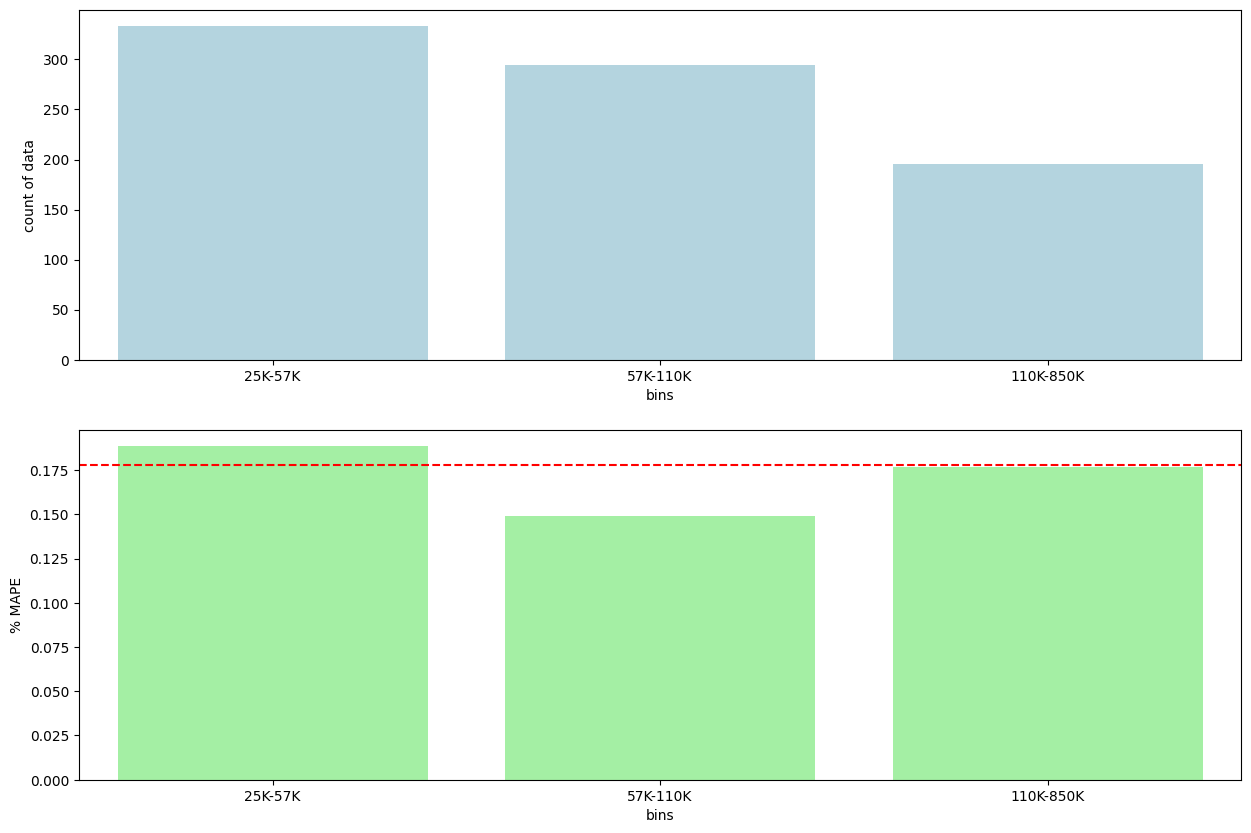

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(data=data, x='bins', color='lightblue', ax=ax1)
ax1.set_ylabel('count of data')

data_by = data.groupby('bins')[['mape']].mean()
cols = ['palegreen' if x < 0.25 else '#708090' for x in data_by['mape']]
sns.barplot(data=data, x='bins', y='mape', 
            palette=cols, ax=ax2, 
            estimator='mean',
            errorbar=None)
ax2.axhline(y=0.178, color='red', ls='--');
ax2.set_ylabel('% MAPE');

After performing binning, it turned out that the model has the highest error percentage for the price range between 57,000 and 110,000 compared to other ranges. Initially, I would have assumed that the model would have difficulty predicting prices above 500,000, given that the 'y_test' for the maximum value generated is 575,000, which is significantly different from the actual 'y' or actual value. When looking at the scatter plot for predicted vs. actual values, there indeed appears to be a clustering of data points, indicating the possibility of a significant deviation from the linear line between predicted and actual values.

### **Conclusion**

The evaluation metrics used for the model are RMSE, MAE, and MAPE. Judging from the MAPE value generated by the model after hyperparameter tuning, which is approximately 16%, we can conclude that if this model is used to estimate the listing prices for used cars on Syarah.com within the trained value range, the price estimates on average will deviate by approximately 16% from the actual prices.

However, it is also possible for the predictions to deviate further, as the model's bias remains relatively high when considering the visualization of actual and predicted prices, especially for prices above 200,000 SAR and within the range of 25,000 to 57,000 SAR. The bias introduced by the model is primarily due to the limited dataset availability for used cars within the price range of 25,000 to 57,000 and above 200,000 SAR.

### **Recommendations**

1. This model can certainly be further improved to yield even better predictions. We can augment the dataset with used cars priced above 25,000-57,000 and above 200,000 SAR.

2. This model can be utilized for estimating the buying and selling prices of used cars, assisting sellers in determining the prices for their vehicles, and enabling buyers to adjust their budget plans for purchasing cars. 

3. This model will enhance transparency regarding car specifications that align with their respective prices, alleviating concerns for both sellers and buyers. Additionally, it can boost the turnover of Syarah.com as a platform for buying and selling used cars.

#### **Save Model**

In [45]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Saudi_Arabia_XGB.sav', 'wb'))

In [46]:
# Load model
filename = 'Model_Saudi_Arabia_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [47]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

30549.93939872988